In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"C:\Users\user\Desktop\New folder (2)\Visualizations\ncr_ride_bookings.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\New folder (2)\\Visualizations\\ncr_ride_bookings.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
pd.options.display.max_columns = 100

In [ ]:
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
data.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

For TIME ; Convert into bins ; Daytime, Night

Location ; Explore a grouping ; urban areas, estates (to a number like 5 groupings)

Payment vs rating

Distribution of ratings based on complete & incomplete rides ; Box plot with hue

Trip distance l rating ; scatter plot

In [ ]:
Waiting time vs rating ; scatterplot ; 

vehicle type vs rating ;  grouped bar chart

customer id vs rating ; Lower ratings ; Filter your dataframe to just ratings below something; goroup by 
customer id, 5

Craft our narrative

Data Cleaning

- Date / Time ; Conversion to datetime type
- Extract hour, weekday/weekend from the date

Univariate Analysis

- Introduce the audience to the dataset ; The number of transactions, the span of the data, the location of the data & give context (India) ; Locations ; Find the demography. What's the median income (Who is the customer base here?)
- Introducing your problem statement ; Our focus will be on Rating ; Tell us what a rating is, what is spans from 0 - 5, and what each of this represents.
- We'll be looking into ratings, with the aim of identifying the core contributors to a ratings.
- The fraction from your dataset that gave the ratings

(Should we explore those who did not give ratings?)

- Understanding Ratings
1.Get a count, mean/median, least & highest of the number or ratings
2.What does the rating distribution look like? ; Customer & Driver
3. Plots ; Have summary statistics, Kde plots, histogram, .describe()
4. Creating sub_dataframe for more analysis (filter ratings below 3, over 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

Bivariate Analysis

- Time of day vs rating

; Feature engineering ; Come up with a column for day/night
; Time column ; Group by hour , getting the mean & count rating perhour
; Line chart. hour (time) against mean(rating) ; Use a bar chart
; Heatmap ; Weekday against average rating (seaborn for the heatmap)
; What hours receive what number of ratings - We recieve ratings at x hour

Locations vs Ratings
- Mentioning the unique number of locations (pickup and dropoff)
- geometry column corresponding to the location provided
- choropleth ; average rating per area
- bar plot (horizontal) ; ranking the highest (10)
- Add a line/marker withint the bar plot for that average rating
- count of locations above the average rating & below the average rating

- Payment method vs rating
- Groupby the payment_method, mean + count of the rating
- Bar 

In [ ]:
data.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
data.groupby('Payment Method')['Driver Ratings'].agg(['mean','count']).sort_values("mean")

,mean,count
Payment Method,,
Debit Card,4.226893,7526
UPI,4.230351,41834
Credit Card,4.231620,9320
Uber Wallet,4.231920,11206
Cash,4.232785,23114


- Incomplete / complete rides vs rating
- groupy, mean 
- barplot

vtat/ctat vs rating

- scatterplot ; vtat vs rating , ctat vs rating
- are longer waiting times/ journey times associated with ratings
- pd.cut (bin the ctat and vtat times) ; grougby the bins ;  get the average rating

In [ ]:
data['Avg CTAT'].describe()

count    102000.000000
mean         29.149636
std           8.902577
min          10.000000
25%          21.600000
50%          28.800000
75%          36.800000
max          45.000000
Name: Avg CTAT, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_28276\3744619084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.cut(data['Avg CTAT'],bins=9))['Customer Rating'].mean().plot(kind="bar")


<Axes: xlabel='Avg CTAT'>

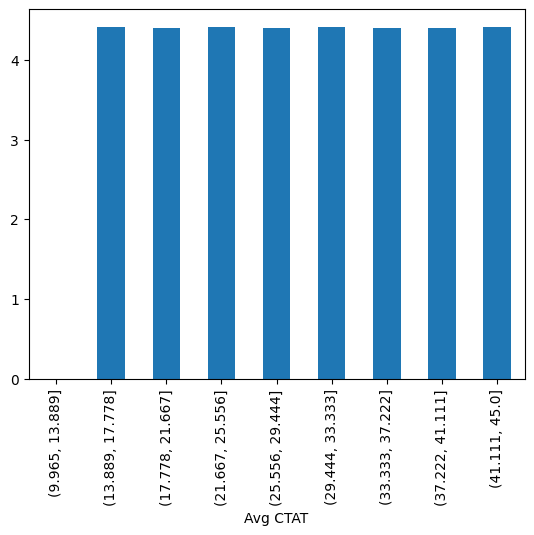

In [ ]:
data.groupby(pd.cut(data['Avg CTAT'],bins=9))['Customer Rating'].mean().plot(kind="bar")

In [ ]:
data.head(3)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card


Multivariate analysis

Ride distance vs rating
- scatterplot
- hue ; vehicle type, 